In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/16 SVM/mushroom.csv')

In [16]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [17]:
df.shape

(2000, 26)

In [18]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [19]:
# Dataset info and summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [20]:
# Check for missing values
df.isnull().sum()


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [21]:
# Check unique values in categorical features
df.nunique()


Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64

In [22]:
df.describe()


,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


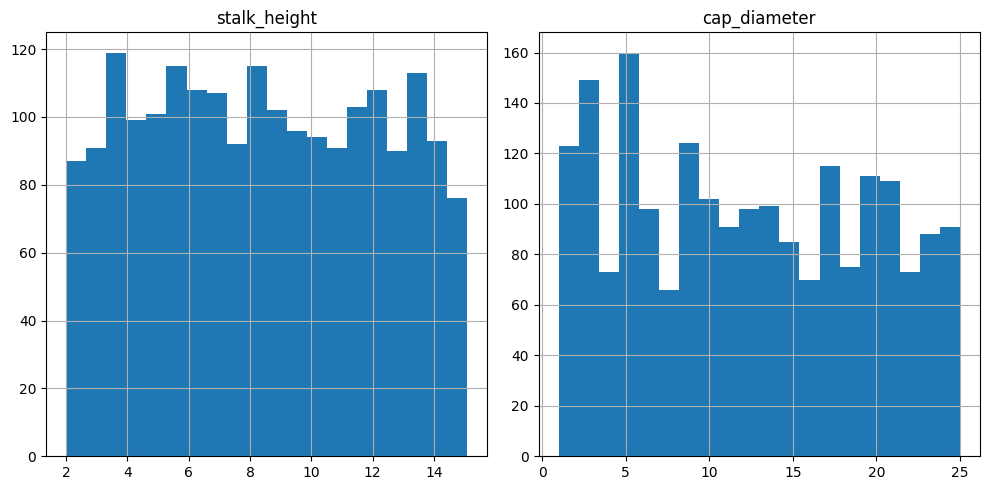

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df[['stalk_height', 'cap_diameter']].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


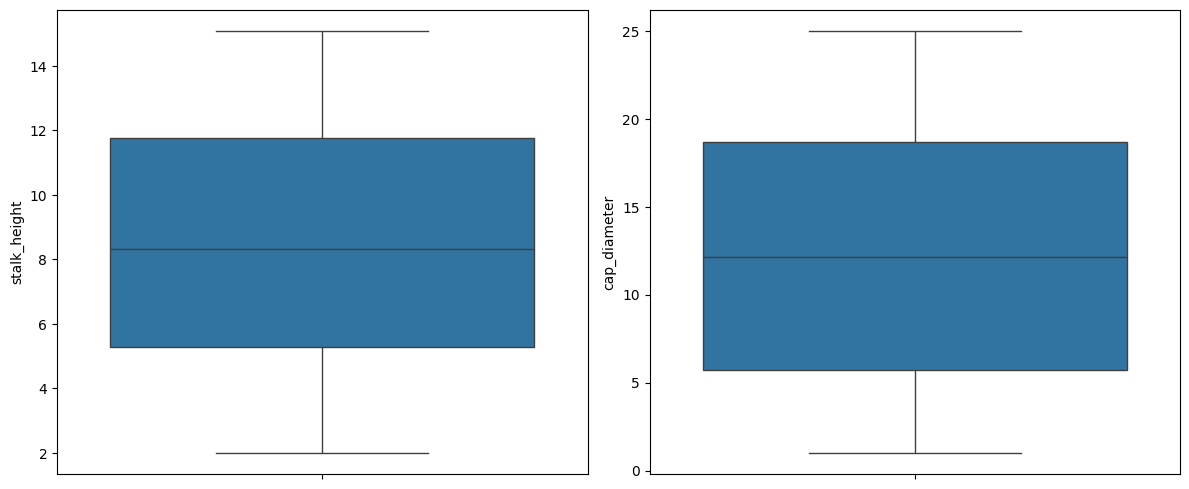

In [24]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 5))
for i, col in enumerate(['stalk_height', 'cap_diameter']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=col, data=df)
plt.tight_layout()
plt.show()


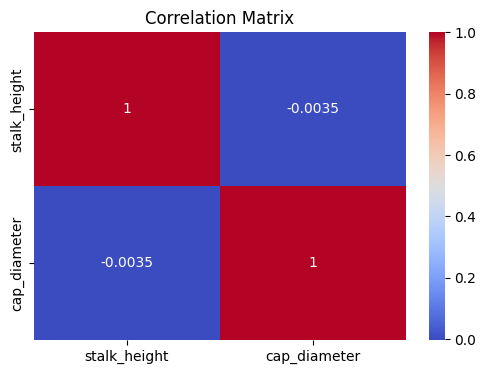

In [25]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(6, 4))
sns.heatmap(df[['stalk_height', 'cap_diameter']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [26]:
# Drop Unnamed column if unnecessary
df = df.drop('Unnamed: 0', axis=1)

# Convert target column to binary (if needed)
df['class'] = df['class'].map({'edible': 0, 'poisonous': 1})

# One-hot encoding with numeric (0/1) output
df_encoded = pd.get_dummies(df.drop(['class'], axis=1), dtype=int)

# Final dataset
X = pd.concat([df_encoded, df['class']], axis=1)
X.head()



,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_data = X.drop('class', axis=1)
y = X['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)


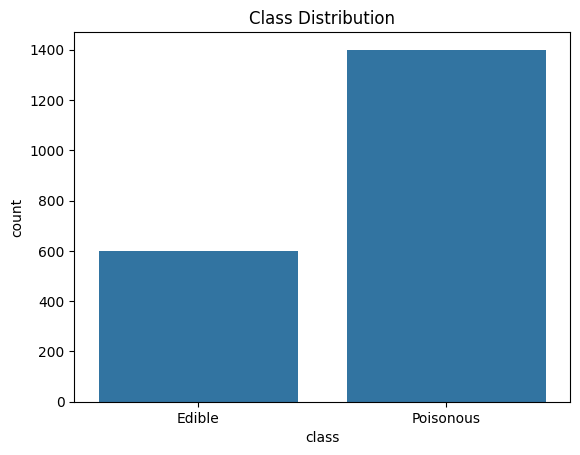

In [28]:
# Visualize class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.show()


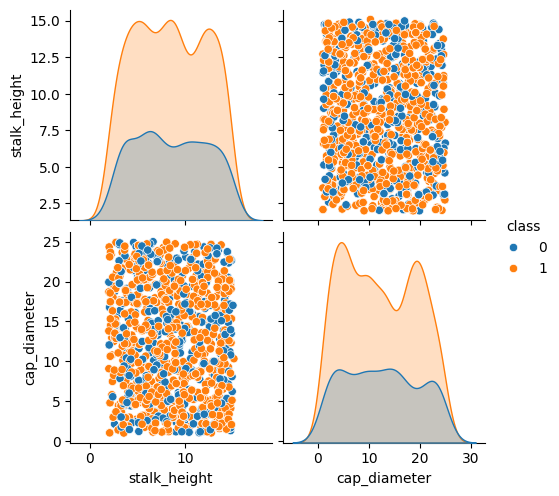

In [29]:
# Pairplot for numeric columns
sns.pairplot(df[['stalk_height', 'cap_diameter', 'class']], hue='class')
plt.show()


In [ ]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,1,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,0,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,1,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,1,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,1,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,1,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,1,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,1,11.092703,8.423199


In [32]:
X

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1996,6.500840,13.501957,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1997,13.558064,11.270020,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1998,11.092703,8.423199,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [33]:
X.shape

(2000, 127)

<Axes: >

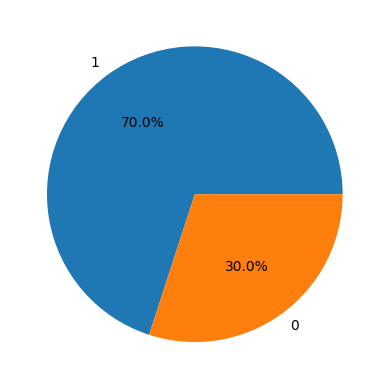

In [44]:
# Percentage Of Male and Femail in titanic
X['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

In [45]:
X_data = X.drop('class', axis=1)
y = X['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [48]:
## Scalling all the Features
sc=StandardScaler()

In [49]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
model = SVC()

In [51]:
model.fit(X_train,y_train)

SVC()

In [52]:
predict=model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {                      
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # All SVM kernel types
    'gamma': ['scale', 'auto'],            # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4],                   # Relevant only for 'poly' kernel
    'coef0': [0.0, 0.5, 1.0]               # Relevant for 'poly' and 'sigmoid' kernels
}




# GridSearchCV setup
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.8512500000000001
